In [1]:
import numpy as np 
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
import pickle as pkl

Loading Training Dataset

In [2]:
dataset = pd.read_csv("./insurance.csv")

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

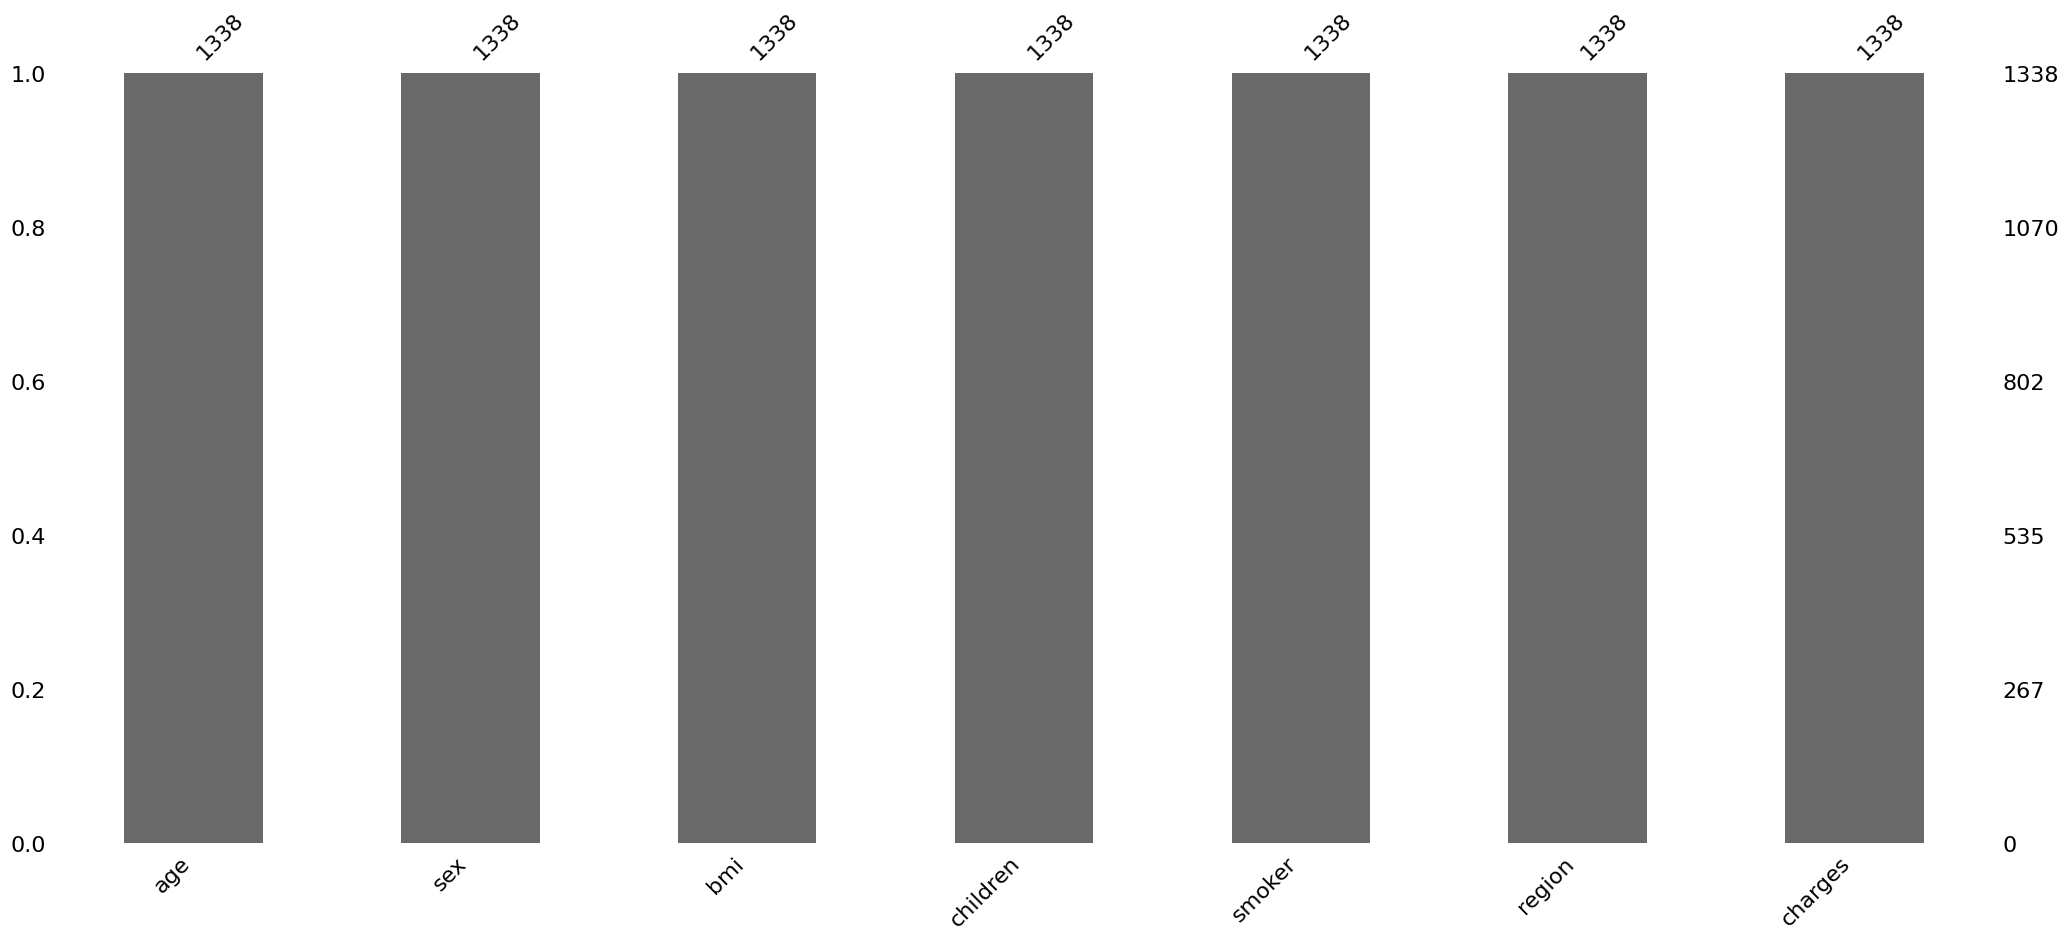

In [7]:
msno.bar(dataset)

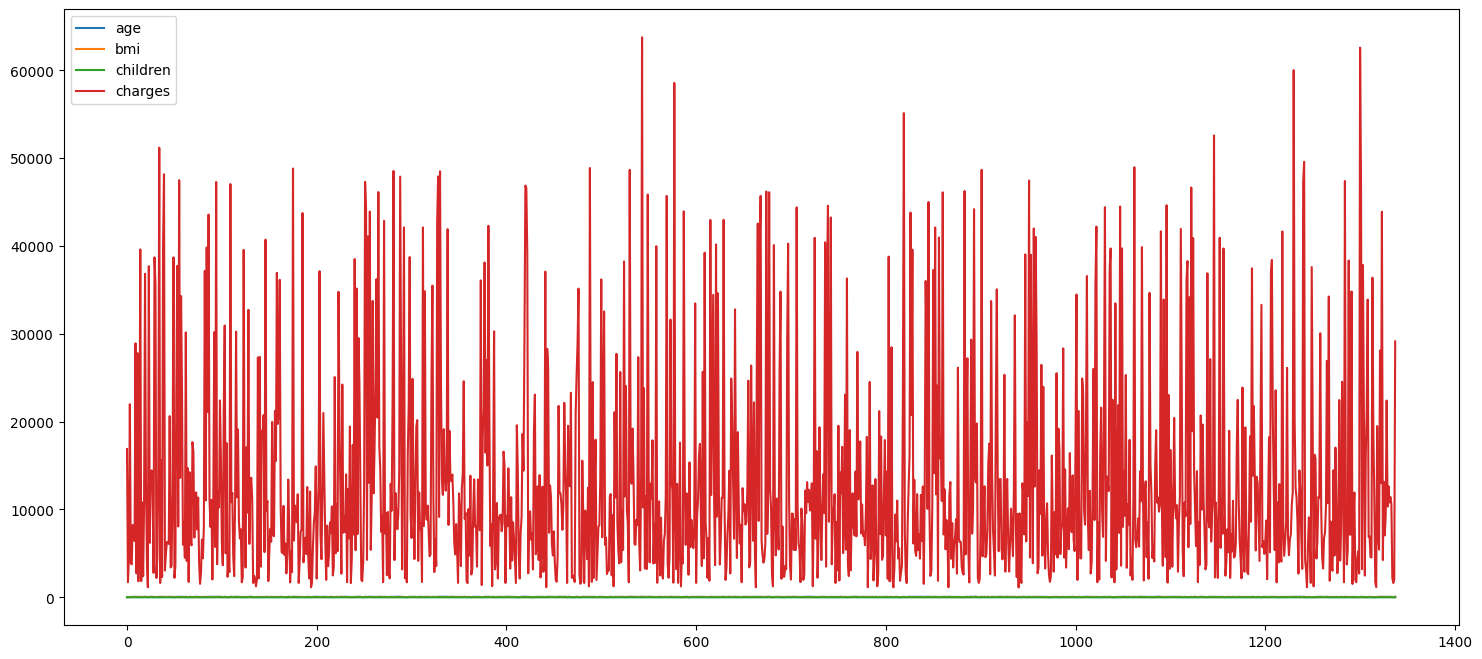

In [8]:
dataset.plot(figsize=(18, 8))

plt.show()

C:\Users\luisj\AppData\Local\Temp\ipykernel_23132\3017228081.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


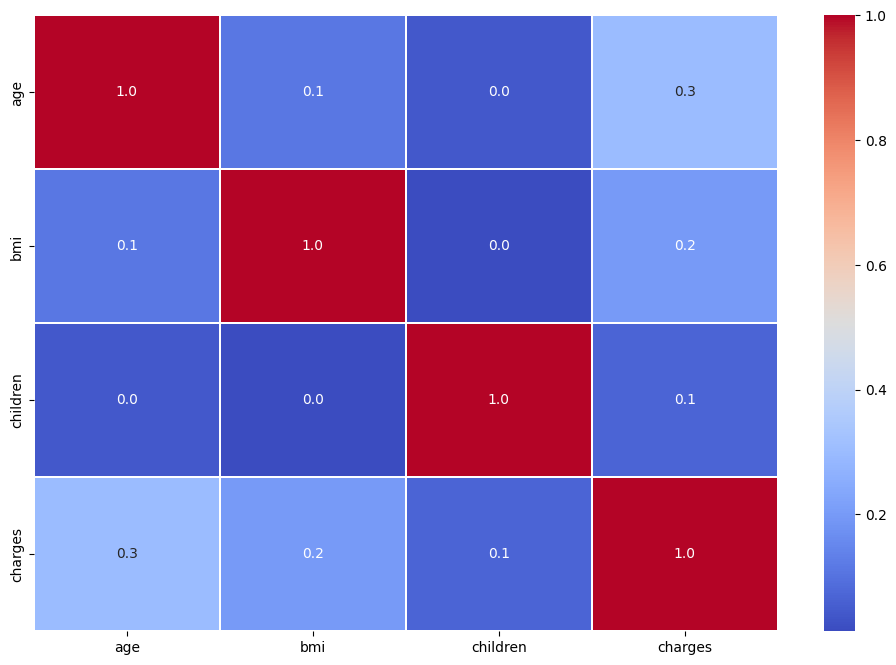

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [10]:
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

Preprocessing Data

In [11]:
X = X.drop(columns=["sex"])

X.smoker = X.smoker.replace({"yes": 1, "no" : 0})

X = pd.get_dummies(X)

In [12]:
X.head()

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,0,0,1,0
2,28,33.000,3,0,0,0,1,0
3,33,22.705,0,0,0,1,0,0
4,32,28.880,0,0,0,1,0,0


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Applying Standard Scaler 

In [14]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.2, random_state=100)

numerical_features = X.select_dtypes(include=['float64', 'int64'])

numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')


X_Train = ct.fit_transform(X_Train)
X_Test = ct.transform(X_Test)

Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [16]:
def get_score(n_estimators) :
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=100)

    model.fit(X_Train, Y_Train)

    y_pred = model.predict(X_Test)

    MAE = mean_absolute_error(Y_Test, y_pred)

    return MAE.mean()


In [17]:
random_forest_tree_numbers = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

results = {}

for i in random_forest_tree_numbers :
    result = get_score(i)
    results[i] = result


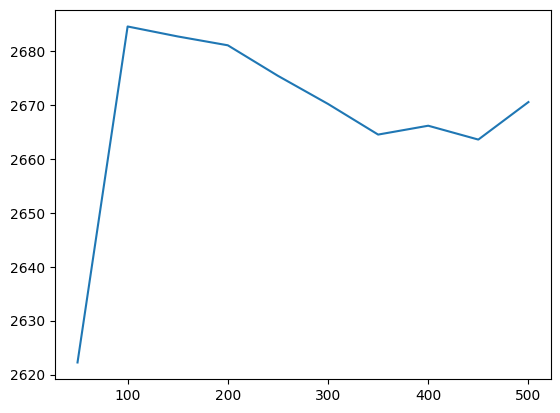

In [18]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [19]:
best_random_forest = RandomForestRegressor(n_estimators=50, random_state=100)

best_random_forest.fit(X_Train, Y_Train)

RandomForestRegressor(n_estimators=50, random_state=100)

In [20]:
y_pred = best_random_forest.predict(X_Test)

print("Test Score:" + str(best_random_forest.score(X_Test, Y_Test)))

MAE = mean_absolute_error(Y_Test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(Y_Test, y_pred)))

Test Score:0.879652090918639
MAE: 2622.2350013834575
R2 Score: 0.879652090918639


XGBRegressor Model

In [21]:
from xgboost import XGBRegressor

In [22]:
xgb_model = XGBRegressor(n_estimators=50, learning_rate=0.05)

In [23]:
xgb_model.fit(X_Train, Y_Train, 
             eval_set=[(X_Test, Y_Test)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
predictions = xgb_model.predict(X_Test)

print("Test Score: " + str(xgb_model.score(X_Test, Y_Test)))

print("MAE: " + str(mean_absolute_error(Y_Test, predictions)))

print("R2 Score: " + str(r2_score(Y_Test, predictions)))

Test Score: 0.8843860920577645
MAE: 2310.665063190502
R2 Score: 0.8843860920577645


Linear Regression Sckit-Learn Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
simple_model = LinearRegression()

simple_model.fit(X_Train, Y_Train)

y_pred = simple_model.predict(X_Test)

print("Test Score:" + str(simple_model.score(X_Test, Y_Test)))

MAE = mean_absolute_error(Y_Test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(Y_Test, y_pred)))

Test Score:0.7947235908648583
MAE: 3916.3236089525876
R2 Score: 0.7947235908648583


Dummy Regressor

In [27]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(X_Train, Y_Train)
y_pred = dummy_regr.predict(X_Test)

MAE_baseline = mean_absolute_error(Y_Test, y_pred)

print("MAE: " + str(MAE_baseline))

MAE: 8669.15590183209


Neural Network Model

In [28]:
num_features = X.shape[1]

nn_model = tf.keras.Sequential()

nn_model.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
nn_model.add(tf.keras.layers.Dense(units=128, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
nn_model.add(tf.keras.layers.Dropout(rate=0.4))
nn_model.add(tf.keras.layers.Dense(units=64, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
nn_model.add(tf.keras.layers.Dropout(rate=0.2))
nn_model.add(tf.keras.layers.Dense(units=32, kernel_regularizer=tf.keras.regularizers.L2(l2=0.001), activation="relu", kernel_initializer="he_normal"))
nn_model.add(tf.keras.layers.Dense(units=1))

In [29]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mean_absolute_error",
    metrics=["mae"]
)
    
history = nn_model.fit(
    X_Train, Y_Train, 
    batch_size=8, 
    epochs=100, verbose=0)

In [30]:
y_pred = nn_model.predict(X_Test)

MAE = mean_absolute_error(Y_Test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(Y_Test, y_pred)))

9/9 [==============================] - 0s 3ms/step
MAE: 1653.493028820604
R2 Score: 0.8944099259658919


Saving the XGB Model

In [ ]:
pkl.dump(xgb_model, open("xgb_model.pkl", "wb"))